# Basic Intro to Fourier 

1. Intuition
2. Mathmatical defenition
4. How To in python
5. Filtering
6. Spectrogram
7. Summary 
8. some extra code with different windows and 2d FFT

## Intuition

there are signals. signals have freqs.

a freq is the rate of change. commenly used with Hz that is $\frac{1}{sec}$. that is the rate of change in *time*. it doesn't have to be time (spatial for images for example)

freq is a very important feature of a signal. it can tell us about the origin of the signal (classification) and alot more. (rader, dopler rader, RF, optics, filtering) 

it wolud be nice if we had a machine that can take a signal as an input and outputs the signals freqs. 


lets plot some signals

In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift, ifftshift
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

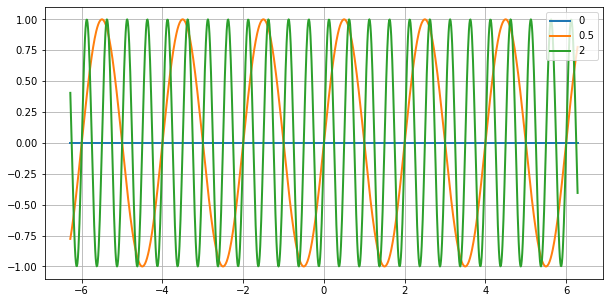

In [2]:
t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
for freq in [0, 0.5, 2]:
    plt.plot(t, np.sin(freq * t * 2 * np.pi), lw=2, label=freq)
plt.grid()
plt.legend()
plt.show()

this is simple. each one of these signals has 1 freq. but there can be more...

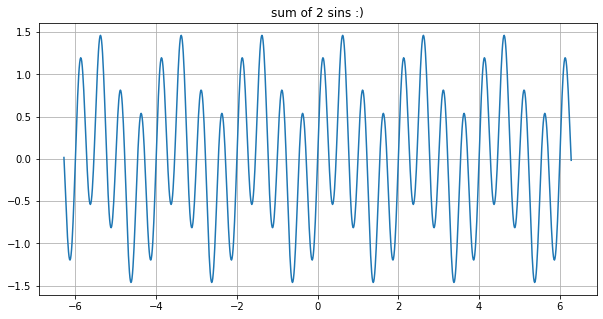

In [3]:
x = np.sin(2.0 * 2.0*np.pi*t) + 0.5*np.sin(0.5 * 2.0*np.pi*t)
plt.plot(t, x)
plt.title('sum of 2 sins :)')
plt.grid()
plt.show()

a bit harder to tell the freq. but we might could do if we try hard enough.
how about the next signal:

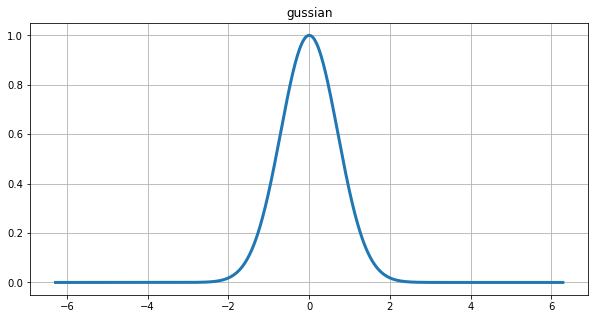

In [4]:
x = np.exp(-t**2)
plt.plot(t, x, lw=3)
plt.grid()
plt.title('gussian')
plt.show()

this is why we need fourier, to tell us about the frequncy companents. 

## Mathematicl defenition and intuition

Before getting started let us show the next definition:

$$ e^{ix} = \cos(x) + i \sin(x)$$


The definition of the Continuos Time Fourier Transform (CTFT) for a given function x(t) is as follows:
$$ X(f) = \mathcal{F}\{x\} (f) = CTFT\{x\}(f) \frac{1}{2\pi} \int_{-\infty}^{\infty} x(t) e^{-i 2 \pi f t} dt $$

Let us get some intuition for this definition:

Recall the definition of inner product on the space of complex functions:
$$ \langle g,h \rangle = \int_{-\infty}^{\infty} g(x) h^{*}(x) dx$$

Also recall that performing inner product between two vectors $u,v$ is basically projecting one onto another.

With all that in mind, we can see that the value of the fourier transform at frequency $f_0$ is actually (up to some constant):

$$ X(f_0) = \mathcal{F}\{x\}(f_0) = \langle x, h_{f_0} \rangle$$ 

where $h_{f_0} = e^{i 2 \pi f_0 t}$ is the harmony coresponding to frequency $f_0$
So basically, CTFT measures for every frequency, what is the projection of our beloved function $x(t)$ on this frequency, or the correlation between our function and $h_{f_0}$ - Imagine the harmonies as our ingredients. CTFT tells us how many of each "ingredient" to put in our bowl in order to get the wanted $x(t)$.

So how do we use this recipe to get $x(t)$? This is exactly the inverse transform:

$$ x(t) = ICTFT\{X\}(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(f) e^{i 2 \pi f t} df $$ 

Note that the inverse transform is very similar to the regular fourier transform and this is not just luck!
The fourier transform posseses the following property (called unitarity):

$$ \mathcal{F}(\mathcal{F} (x)) = x^{*} (-t)$$

Basically this property's meaning is that up to complex conjugation and mirroring, fourier transform and its inverse are basically the same!

Here are some examples of common fourier transfoems:

$$x(t) = e^{i 2 \pi f_0 t} \xrightarrow{}{} X(f) = \delta(f-f_0)$$

$$x(t) = \cos (2 \pi f_0 t) \xrightarrow{}{} X(f) = \frac{1}{2} \left[\delta(f-f_0) + \delta(f+f_0)\right]$$

$$x(t) = e^{-\alpha t^2} \xrightarrow{}{} X(f) = \sqrt{\frac{\pi}{\alpha}} e^{-\frac{(\pi f)^2}{\alpha}}$$

### Sampling and Descretization

So integrals are SUPERRRRR AMAZINGGGGG but, unfortunately, integrals, and continuos functions and operations are not objects that we can represent in computers. In order to utilize fourier analysis for digital use, we will have to take two steps that will help us getting fourier on our screen. (However, remember that nothing comes without a cost!! ):

1) Sampling (the signal)

2) Discretizing (the transform)

**1) Sampling:**

So we want to go from a continuous time signal: $\{ x(t) | -\infty < t< \infty \}$ to a set of *finite* samples of the signal $\{ x[n] | 0 \leq n \leq N\} $. The most straight forward way to do that is as follows:
Fix some constant $T_s$ that we shall call the sampling interval. The sampled signal is given by:

$$ x[n] = x(nT_s) , 0\leq n \leq N-1$$

So what happens here? We got a descrete time signal, but what did we lose? It is obvious that we lost some information on the signal, but, with the great help of shannon and Nyquist we can show that if we sample fast enough, we will not loose information.

![title](AliasingSines.png) 

**2) Descretizing:**

The Discrete Fourier Tranform (DFT) of a discrete time signal $x[n]$ is given by:

$$ X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2 \pi k n}{N}}$$

What does this have to do with frequencies??? In DFT we have a finite set of frequencies on which we evaluate the fourier transform - so 

$$ k \xrightarrow{} f_k = \frac{k}{2N} f_s = \frac{k}{2N T_s}$$

Note that this means that the our frequency range is limited to $f_{max} = f_{k=N-1} = \frac{N-1}{2N} f_s $ - so we get to half of the sampling rate!

FFT is a fast and efficient implementation of DFT and the terms are used interchangably.

## How To in python

In [5]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [6]:
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

note that we didn't give the fft function any time vector, it has no idea if 1 sec passed between each point, or 100 years. for a machine that is shold find rates of change, that could be a problem. that means we need to compute ourselves the the freq range

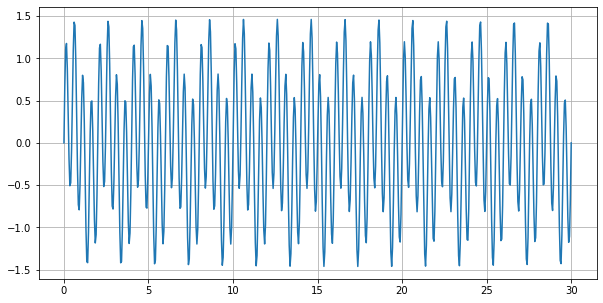

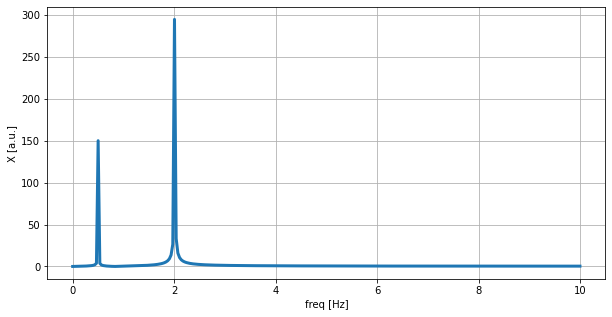

In [7]:
# create signal
N = 600 # Number of sample points
T = 1.0 / 20.0  # smapling freq? 
t = np.linspace(0, N*T, N)  # time vector
x = np.sin(2.0 * 2.0*np.pi*t) + 0.5*np.sin(0.5 * 2.0*np.pi*t)
X = fft(x)
f = np.linspace(0.0, (T ** -1) / 2 , N//2)

plt.plot(t, x)
plt.grid()
plt.show()

plt.plot(f, np.abs(X[0:N//2]), lw=3)
plt.xlabel('freq [Hz]')
plt.ylabel('X [a.u.]')
plt.grid()
plt.show()

# note the positive half

we only look at the first half of the fft output because the second half is symetric. plus note that we created ourselves the freq vector, that extand from zero to half the sampaling freq (20/2=10). and has half the points of the originl signal (N//2)

sum of sines is very simple. what are the freq of a rect function?

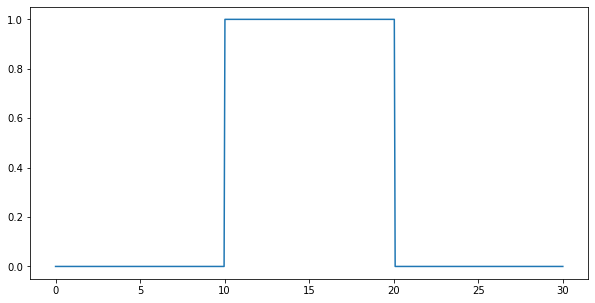

In [20]:
N = 600 # Number of sample points
T = 1.0 / 20.0  # smapling freq? 
t = np.linspace(0, N*T, N)  # time vector

rect = np.zeros(N)
half_width = 100 # 50
rect[N//2 - half_width: N//2 + half_width + 1] = 1
plt.plot(t, rect)
plt.show()

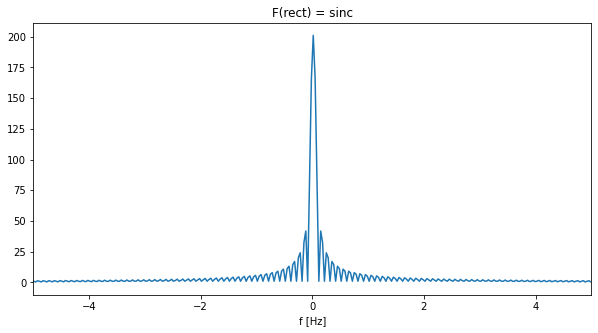

In [21]:
RECT = fftshift(fft(rect))
fs = T**(-1)
whole_f = np.linspace(-fs/2, fs/2, N)
plt.plot(whole_f, np.abs(RECT))
plt.xlim([-5, 5])
plt.xlabel('f [Hz]')
plt.title('F(rect) = sinc')
plt.show()

inifint support in freq domain, finite in time, this lead us to the important result of time-freq tradeoff. wide in time is nerrow in freq and vice versa. 

## Filtering

we can use FFT to do digital filtering of a signal. i.e. we and remove noise or listen to a specific freq in the radio. isdtead of doing a complex operation in the time domain, we can do simple things in the freq domain

in a nutshell:
1. sample signal
2. do FFT (move to freq domain)
3. do filtering (or whatever)
4. do iFFT 

lets see a simle example. 

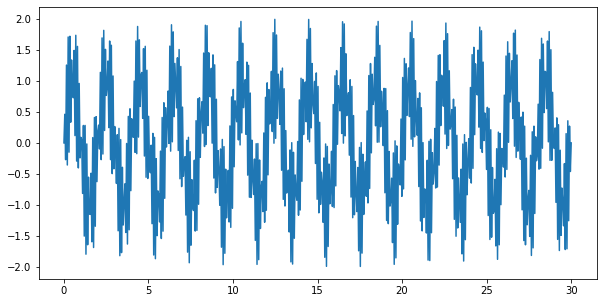

In [22]:
signal = np.sin(0.5 * 2 * np.pi * t)
noise = np.sin(9 * 2 * np.pi * t)
noisy_signal = signal + 1 * noise
plt.plot(t,noisy_signal)
plt.show()

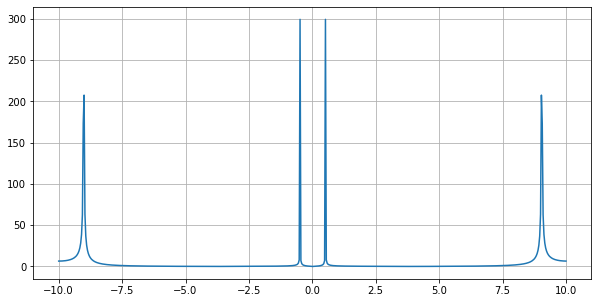

In [23]:
# we got the signal and it is very noisy...
# do FFT
F = fftshift(fft(noisy_signal))
plt.plot(whole_f, np.abs(F))
plt.grid()

we want to remove the high noisy freq, and keep the original signal unchanged. we can do it using a low pass fillter (LPF). 



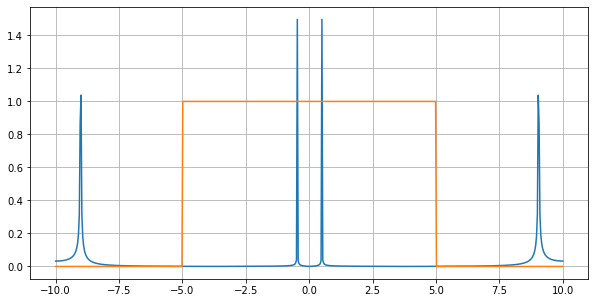

In [12]:
# make a LPF
lpf = np.zeros(len(F))
cutoff = 5.0  # [Hz]
lpf[np.abs(whole_f) < cutoff] = 1

# plot
plt.plot(whole_f, np.abs(F) / 200)
plt.plot(whole_f, lpf)
plt.grid()

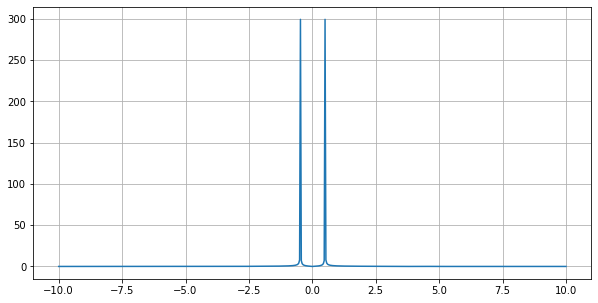

In [13]:
# do oparation

clean_F = lpf * F

plt.plot(whole_f, np.abs(clean_F))
plt.grid()

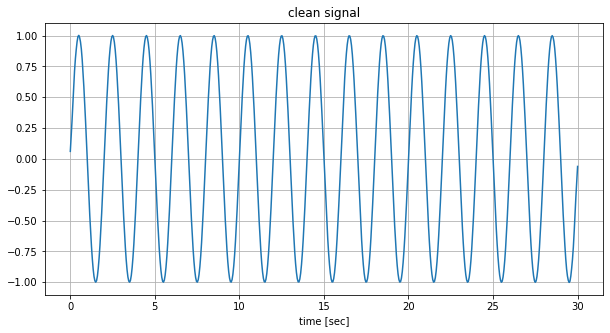

In [14]:
# do iFFT (back to time)

clean_signal = np.real(ifft(ifftshift(clean_F)))
plt.plot(t, clean_signal)
plt.xlabel('time [sec]')
plt.title('clean signal')
plt.grid()


## Spectrogram

up untill now we assumed the freq didn't change over time. how ever this is not the case usually. lets consider our favurite data, images, and videos! it is possible for different region of the video to have different freq. how ever it is possible of the same region to have differet freq over time. and when we do FFT we lose all resulation in time. 

so what is the solution? split the signal to small parts over time, and do FFT for each part. this is called a spectrogram. 

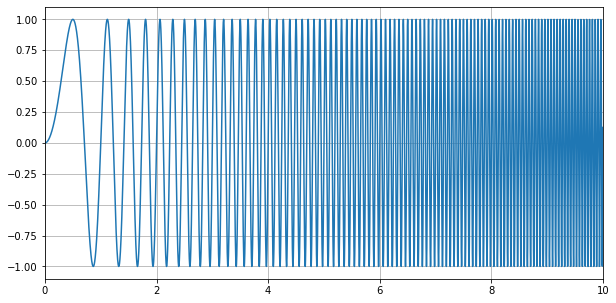

In [44]:
from scipy.signal import spectrogram

fs = 10e2
N = 1e5
time = np.arange(N) / float(fs)
freq = time  # goes from 0 to 100
x = np.sin(2 * np.pi * freq * time)


plt.plot(time, x)
plt.grid()
plt.xlim([0, 10])
plt.show()

if we do fft, we get:

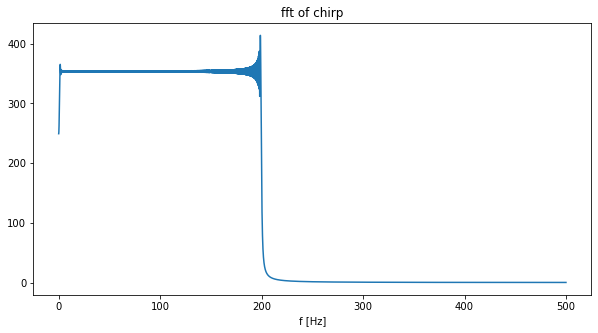

In [46]:
X = fft(x)
f = np.linspace(0, fs / 2, int(N / 2))
plt.plot(f, np.abs(X[:int(N / 2)]))
plt.xlabel('f [Hz]')
plt.title('fft of chirp')
plt.show()

hard to tell what's up with this signal

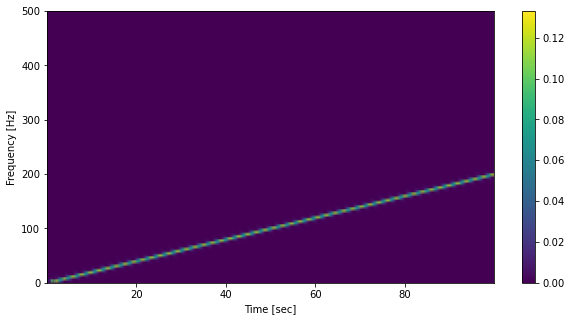

In [27]:
f, t, Sxx = spectrogram(x, fs)  # note that we pass fs
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

## Summary 

this was a brief and hopefully intuitive intro to Forier analysis. you shold be able to start analize your own signals and get some better understanding of the freq that builds these signals. 

However, there is **alot** that we didn't cover, like practical tools such as: differnt choises for windows and mulitidim transform (see code below). and more theortical things like aliasing and harmonics. 

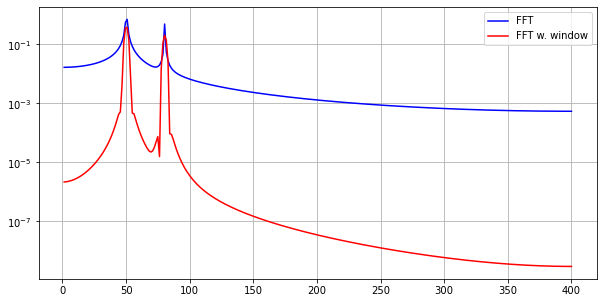

In [17]:

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

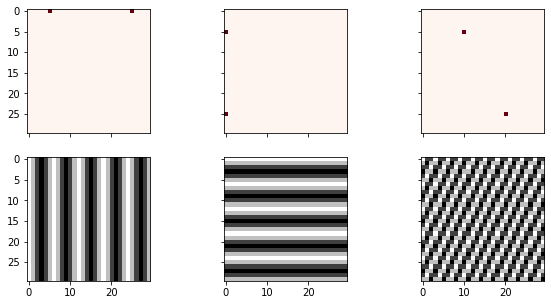

In [18]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()